In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [3]:
# read the data 
df = pd.read_csv("cat_txns_full.csv")

In [4]:
df.head()

,transaction_date,amount,txn_type,balance,narration,category
0,2024-07-11,10996.16,credit,56147.93,CASH DEPOSIT AT Joannaton BRANCH,cash deposit
1,2023-08-31,2001.34,debit,54308.62,POS-Mathis and Sons-MEAL PURCHASE,food
2,2023-09-03,1101.51,debit,41197.39,"EMI PAYMENT TO Thompson, Martinez and Stout",loan
3,2024-02-04,9946.55,credit,41238.94,INVESTMENT TO MUTUAL FUND-enhance bricks-and-c...,investment
4,2024-08-29,10016.63,credit,43499.92,CASH DEPOSIT AT West Curtisberg BRANCH,cash deposit


### Exploratory Data Analysis

In [5]:
# check data type and null values presence 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_date  50000 non-null  object 
 1   amount            50000 non-null  float64
 2   txn_type          50000 non-null  object 
 3   balance           50000 non-null  float64
 4   narration         50000 non-null  object 
 5   category          50000 non-null  object 
dtypes: float64(2), object(4)
memory usage: 2.3+ MB


In [6]:
# check duplicates - if False no duplicates exist 
df["narration"].duplicated().any()

True

In [7]:
df.describe()

,amount,balance
count,50000.000000,50000.000000
mean,10096.840074,50019.825441
std,15897.386444,10029.065858
min,-1056.000000,8997.070000
25%,1645.610000,43251.282500
50%,3441.965000,50043.195000
75%,9903.102500,56764.785000
max,84706.380000,88999.640000


In [8]:
df["category"].value_counts().sort_values()

category
investment         6176
cash deposit       6202
loan               6221
salary             6222
cash withdrawal    6259
bank charges       6262
food               6291
bounce cheque      6367
Name: count, dtype: int64

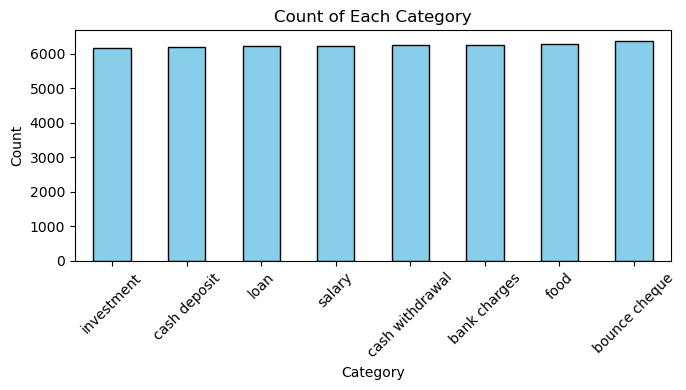

In [9]:
# check class distribution - categories seem evenly distributed - bounce cheque has highest count 

category_counts = df['category'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(7, 4))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Each Category')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [10]:
# check token count distribution  
df["narr_len"] = df["narration"].apply(lambda x: len(x.split()))

In [11]:
# word-wise token distribution 
df["narr_len"].describe()

count    50000.000000
mean         4.511660
std          1.494814
min          2.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          7.000000
Name: narr_len, dtype: float64

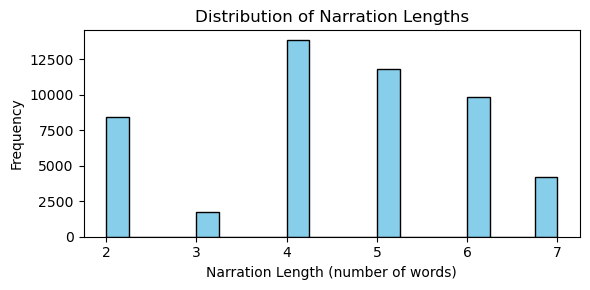

In [12]:
plt.figure(figsize=(6,3))
plt.hist(df["narr_len"], bins=20, color="skyblue", edgecolor="black")

plt.xlabel("Narration Length (number of words)")
plt.ylabel("Frequency")
plt.title("Distribution of Narration Lengths")
plt.tight_layout()
plt.show()

In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer(stop_words = "english")
vec = cv.fit_transform(df["narration"])

count = pd.DataFrame(vec.toarray(),columns = cv.get_feature_names_out())

In [14]:
count["category"] = df["category"]

In [15]:
count.groupby("category").sum()

,24,365,aabm00549793326169,aacsgbem,aaddgbb8dyj,aadm29587504939133,aadq43767740080311,aafl63398316039805,aagj28435541235274,aahp34978084715245,...,zzpi88604304657582,zzpqgbi3,zzro76713073393585,zztfgbhzrdj,zztjgbo6,zzvm85324121465091,zzwvgblu,zzyd71059979340121,zzywgbq0gh9,zzzz01190263633594
category,,,,,,,,,,,,,,,,,,,,,
bank charges,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bounce cheque,0,0,1,0,0,1,1,1,1,1,...,1,0,1,0,0,1,0,1,0,1
cash deposit,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cash withdrawal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
food,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
investment,208,103,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
loan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
salary,0,0,0,1,1,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0


In [16]:
# fit the tfdidf model to check word frequency per cateogry
tfidf = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf.fit_transform(df['narration'])


tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
tfidf_df['category'] = df['category']

res_idf = tfidf_df.groupby('category').mean()

In [17]:
list(res_idf.loc["cash deposit"].sort_values(ascending = False).head(5).index.values)

['deposit', 'cash', 'branch', 'east', 'new']

In [18]:
list(res_idf.loc["salary"].sort_values(ascending = False).head(5).index.values)

['neft', 'credit', 'salary', 'sons', 'group']

### Text Cleaning and Tokenization

In [19]:
# prepare input text for model training  
df["narr_inp"] = df["narration"].str.lower()

In [20]:
# clean text
import re 
def clean_text(row):
    clean = re.sub(r'[₹$]', 'curr',row)
    clean = re.sub(r'[^a-zA-Z0-9\s]', ' ', clean)
    return clean 

df["narr_inp"] = df["narr_inp"].apply(clean_text)

# standardize whitespaces 
df["narr_inp"] = df["narr_inp"].str.replace(r'/s+', ' ', regex = True)

In [21]:
print("shape before dropping duplicate narrs :", df.shape)
df = df.drop_duplicates(subset=['narr_inp'])
print("shape before dropping duplicate narrs :", df.shape)

shape before dropping duplicate narrs : (50000, 8)
shape before dropping duplicate narrs : (41101, 8)


In [22]:
import torch
from transformers import AutoTokenizer

# we will use distilbert tokenizer 
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

enc = tokenizer(
    df.narr_inp.to_list(),
    padding=True,           
    truncation=True,        
    return_tensors="pt"     
)

In [23]:
# checking the token ids for the first narration 
enc['input_ids'][0]

tensor([  101,  5356, 12816,  2012, 15730,  2669,  3589,   102,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0])

In [24]:
enc["input_ids"].dtype

torch.int64

In [25]:
df.narr_inp[0]

'cash deposit at joannaton branch'

In [26]:
print(enc["input_ids"].shape)  # (batch_size, seq_len)
print(enc["attention_mask"][0])

torch.Size([41101, 23])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [27]:
# checking mapping of tokens (post tokenization of narration text) to token ids 
tokenizer.convert_ids_to_tokens(enc["input_ids"][0])

['[CLS]',
 'cash',
 'deposit',
 'at',
 'joanna',
 '##ton',
 'branch',
 '[SEP]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]']

### Model Training 

In [28]:
# use GPU operation for optimizing training run
device = "mps" if torch.backends.mps.is_available() else "cpu"
print(device)

mps


In [29]:
from datasets import Dataset, Features, ClassLabel, Sequence, Value

# label encoding for classes
labels_list = sorted(df["category"].unique())          
label2id = {lbl: i for i, lbl in enumerate(labels_list)}
y = df["category"].map(label2id).astype("int64").tolist()

# schema for dataset 
features = Features({
    "input_ids":      Sequence(Value("int64")),
    "attention_mask": Sequence(Value("int64")),
    "labels":         ClassLabel(names=labels_list),  
})

# create dataset with encoding vals and labels 
dataset = Dataset.from_dict(
    {
        "input_ids": enc["input_ids"].tolist(),
        "attention_mask": enc["attention_mask"].tolist(),
        "labels": y,                               
    },
    features=features
)

# split dataset into training and evaluation 
splits = dataset.train_test_split(test_size=0.30, stratify_by_column="labels", seed=42)
train_ds, eval_ds = splits["train"], splits["test"]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [30]:
# choose distilBERT for fine-tuning
from transformers import DistilBertForSequenceClassification
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=8
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [38]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import numpy as np
from transformers import TrainingArguments, Trainer


# metrics to evaluate classifier performance
def eval_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)  
    acc = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="weighted")
    cm = confusion_matrix(labels, preds)

    return {
        "accuracy": acc,
        "f1": f1,
        "precision": precision,
        "recall": recall,
        "confusion_matrix": cm.tolist()   
    }


# setting 3 epochs
n_epoch = 3

training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs= n_epoch,
    eval_strategy="epoch",
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_dir="./logs",
)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=eval_ds,
    tokenizer=tokenizer,
    compute_metrics = eval_metrics
)

/var/folders/yd/c6pqg7cn1zg9lxy5vkyf64fm0000gn/T/ipykernel_63183/472858572.py:32: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [39]:
trainer.train()

/Users/akhilmathur/anaconda3/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall,Confusion Matrix
1,0.000200,0.000067,1.000000,1.000000,1.000000,1.000000,"[[291, 0, 0, 0, 0, 0, 0, 0], [0, 1910, 0, 0, 0, 0, 0, 0], [0, 0, 1542, 0, 0, 0, 0, 0], [0, 0, 0, 1555, 0, 0, 0, 0], [0, 0, 0, 0, 1692, 0, 0, 0], [0, 0, 0, 0, 0, 1814, 0, 0], [0, 0, 0, 0, 0, 0, 1660, 0], [0, 0, 0, 0, 0, 0, 0, 1867]]"
2,0.000000,0.000010,1.000000,1.000000,1.000000,1.000000,"[[291, 0, 0, 0, 0, 0, 0, 0], [0, 1910, 0, 0, 0, 0, 0, 0], [0, 0, 1542, 0, 0, 0, 0, 0], [0, 0, 0, 1555, 0, 0, 0, 0], [0, 0, 0, 0, 1692, 0, 0, 0], [0, 0, 0, 0, 0, 1814, 0, 0], [0, 0, 0, 0, 0, 0, 1660, 0], [0, 0, 0, 0, 0, 0, 0, 1867]]"
3,0.000000,0.000004,1.000000,1.000000,1.000000,1.000000,"[[291, 0, 0, 0, 0, 0, 0, 0], [0, 1910, 0, 0, 0, 0, 0, 0], [0, 0, 1542, 0, 0, 0, 0, 0], [0, 0, 0, 1555, 0, 0, 0, 0], [0, 0, 0, 0, 1692, 0, 0, 0], [0, 0, 0, 0, 0, 1814, 0, 0], [0, 0, 0, 0, 0, 0, 1660, 0], [0, 0, 0, 0, 0, 0, 0, 1867]]"


/Users/akhilmathur/anaconda3/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Trainer is attempting to log a value of "[[291, 0, 0, 0, 0, 0, 0, 0], [0, 1910, 0, 0, 0, 0, 0, 0], [0, 0, 1542, 0, 0, 0, 0, 0], [0, 0, 0, 1555, 0, 0, 0, 0], [0, 0, 0, 0, 1692, 0, 0, 0], [0, 0, 0, 0, 0, 1814, 0, 0], [0, 0, 0, 0, 0, 0, 1660, 0], [0, 0, 0, 0, 0, 0, 0, 1867]]" of type <class 'list'> for key "eval/confusion_matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
/Users/akhilmathur/anaconda3/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/Users/akhilmathur/anaconda3/lib/python3.11/site-packages/torch/utils/data/datal

TrainOutput(global_step=10791, training_loss=0.009048554081834501, metrics={'train_runtime': 1213.7265, 'train_samples_per_second': 71.112, 'train_steps_per_second': 8.891, 'total_flos': 513658485819360.0, 'train_loss': 0.009048554081834501, 'epoch': 3.0})

### Model Evaluation 

In [42]:
results = trainer.evaluate(eval_dataset=eval_ds)

/Users/akhilmathur/anaconda3/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)

KeyboardInterrupt



In [49]:
del results["eval_confusion_matrix"]

# print performance metrics of classifier 
results

{'eval_loss': 4.03891999667394e-06,
 'eval_accuracy': 1.0,
 'eval_f1': 1.0,
 'eval_precision': 1.0,
 'eval_recall': 1.0,
 'eval_runtime': 26.6611,
 'eval_samples_per_second': 462.509,
 'eval_steps_per_second': 57.837,
 'epoch': 3.0}

/Users/akhilmathur/anaconda3/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Trainer is attempting to log a value of "[[291, 0, 0, 0, 0, 0, 0, 0], [0, 1910, 0, 0, 0, 0, 0, 0], [0, 0, 1542, 0, 0, 0, 0, 0], [0, 0, 0, 1555, 0, 0, 0, 0], [0, 0, 0, 0, 1692, 0, 0, 0], [0, 0, 0, 0, 0, 1814, 0, 0], [0, 0, 0, 0, 0, 0, 1660, 0], [0, 0, 0, 0, 0, 0, 0, 1867]]" of type <class 'list'> for key "eval/confusion_matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
/Users/akhilmathur/anaconda3/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


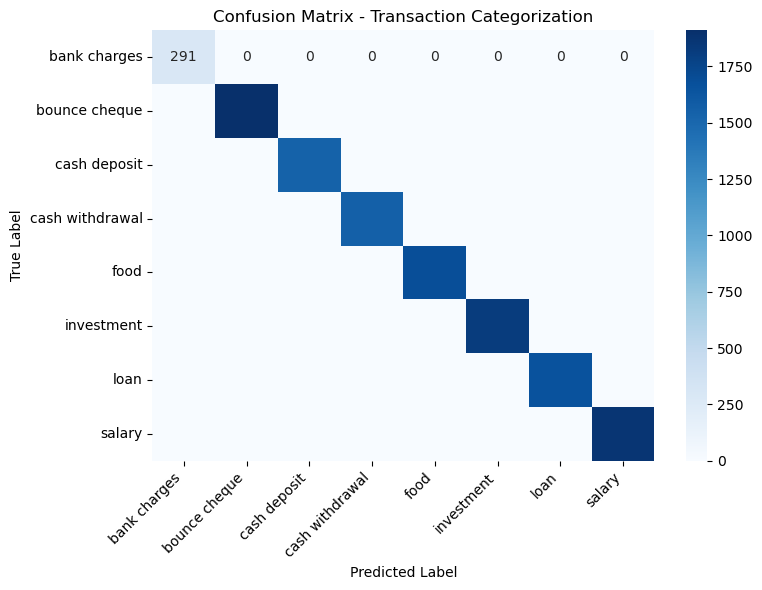

In [46]:
# generate heatmap for confusion matrix - focus on critical categories like bounce, salary to ensure lowest FNs for such txns 

results = trainer.evaluate(eval_dataset=eval_ds)
predictions = trainer.predict(eval_ds)
y_true = predictions.label_ids
y_pred = np.argmax(predictions.predictions, axis=1)

cm = confusion_matrix(y_true, y_pred)
labels_list = sorted(df["category"].unique())
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels_list,
            yticklabels=labels_list)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()